<a href="https://colab.research.google.com/github/liviaguirao/lista5/blob/main/lista2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Discente: *Lívia Faria Guirão - 202165087A*


# Códigos para a resolução dos exercícios


In [ ]:
# Install Geopandas
#!pip install git+git://github.com/geopandas/geopandas.git
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 32.4 MB/s 
     |████████████████████████████████| 16.7 MB 255 kB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [ ]:
#Fronteiras de todos os países do mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 

#Configurando para aumentar o tamanho das figuras de todos os graficos deste notebook
plt.rcParams['figure.figsize'] = [10, 10]

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.title_fontsize'] = 'large'
plt.rcParams['legend.fontsize'] = 'large'


In [ ]:
import requests

csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
print(csv_url)
req = requests.get(csv_url)
url_content = req.content
csv_file = open('downloaded.csv', 'wb')

csv_file.write(url_content)
csv_file.close()


https://covid.ourworldindata.org/data/owid-covid-data.csv


In [ ]:
csvfile='downloaded.csv'
df = pd.read_csv(csvfile)

In [ ]:
north_america = world[(world.continent=='North America')]

In [ ]:
world['covid_people_vaccinated'] = np.zeros(len(world)) 
world['covid_people_fully_vaccinated'] = np.zeros(len(world))
world['covid_total_boosters'] = np.zeros(len(world))

In [ ]:
covid_owid = df
covid_sm = covid_owid[covid_owid.continent=='North America']

covid_sm.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5857,AIA,North America,Anguilla,2020-03-28,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.88,NaN,15877.0,NaN,NaN,NaN,NaN
5858,AIA,North America,Anguilla,2020-03-29,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.88,NaN,15877.0,NaN,NaN,NaN,NaN
5859,AIA,North America,Anguilla,2020-03-30,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.88,NaN,15877.0,NaN,NaN,NaN,NaN
5860,AIA,North America,Anguilla,2020-03-31,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.88,NaN,15877.0,NaN,NaN,NaN,NaN
5861,AIA,North America,Anguilla,2020-04-01,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.88,NaN,15877.0,NaN,NaN,NaN,NaN


In [ ]:
for ind in north_america.index:
  north_america.at[ind,'covid_people_vaccinated'] = np.nanmax(covid_owid[covid_owid.iso_code==world['iso_a3'][ind]].people_vaccinated.values)
  north_america.at[ind,'covid_people_fully_vaccinated'] = np.nanmax(covid_owid[covid_owid.iso_code==world['iso_a3'][ind]].people_fully_vaccinated.values)
  north_america.at[ind,'covid_total_boosters'] = np.nanmax(covid_owid[covid_owid.iso_code==world['iso_a3'][ind]].total_boosters.values)

  
  north_america.at[ind,'pop_est'] = np.nanmax(covid_owid[covid_owid.iso_code==world['iso_a3'][ind]].population.values)


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: All-NaN slice encountered
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.

In [ ]:
north_america['ao_menos_uma_dose'] = north_america.covid_people_vaccinated / north_america.pop_est
north_america['está_totalmente_imunizada'] = north_america.covid_people_fully_vaccinated / north_america.pop_est
north_america['recebeu_a_dose_reforço'] = north_america.covid_total_boosters / north_america.pop_est

# Exercício I

 Faça o mapa coroplético da fração da população que recebeu ao menos uma dose da vacina contra COVID-19 na America do Norte
 

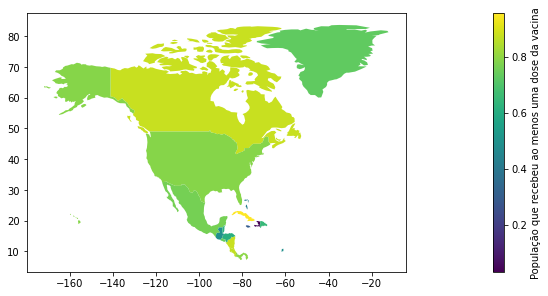

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

north_america.plot(column='ao_menos_uma_dose', ax=ax, legend=True, cax=cax, legend_kwds={'label': "População que recebeu ao menos uma dose da vacina"});

# Exercício II

Faça o mapa coroplético da fração da população que está totalmente imunizada contra COVID-19 na America do Norte

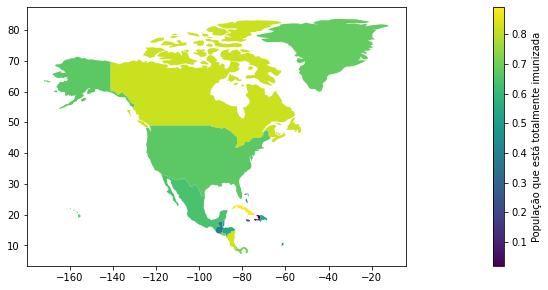

In [ ]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

north_america.plot(column='está_totalmente_imunizada', ax=ax, legend=True, cax=cax, legend_kwds={'label': "População que está totalmente imunizada"});


# Exercício III

Faça o mapa coroplético da fração da população que recebeu a dose reforço da vacina contra COVID-19 na America do Norte

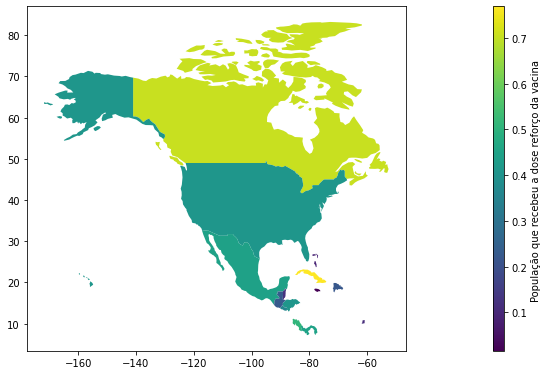

In [ ]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

north_america.plot(column='recebeu_a_dose_reforço', ax=ax, legend=True, cax=cax, legend_kwds={'label': "População que recebeu a dose reforço da vacina "});

# Relatório

 A covid-19 é uma doença que surgiu na China, que afeta principalmente o sistema respiratório, tendo sintomas parecidos com o de uma gripe. 

 Essa doença se espalhou rapidamente por todo mundo, se tornando uma pandemia. Com isso todos tiveram que se isolar em suas residências e adotar medidas de proteção, como uso de máscara e higienização com álcool, pois não havia cura, apenas tratamentos que tratavam dos sintomas.

 Os hospitais do mundo todo ficaram lotados, e muitos sem recursos para combater o vírus. No mundo todo ouve milhões de mortes. E até hoje estamos combatendo o vírus, porém agora com as vacinas.

 No final de 2020 e começo de 2021 a população do mundo todo já começou a ser vacinada, com as duas doses previstas inicialmente, ou uma, dependendo da fabricante da vacina, e logo depois as doses de reforço. E esse foi o estudo que fizemos nos gráficos acima, sobre os dados da vacinação contra a covid, porém analisando apenas a América do Norte. 

 Desde então, os números de morte e casos foram abaixando consideravelmente dia a dia, e nos momentos atuais todos já puderam retomar suas rotinas, os estudantes puderam retornar às escolas, empresas com seus funcionários, eventos, viagens, tudo que não era permitido, por conta do contato que as pessoas não podiam ter, devido a transmissão do vírus, está sendo retomado agora graças a vacinação.